# Taming math and physics using `SymPy`

## Introduction

You can use a computer algebra system (CAS) to compute complicated
math expressions, solve equations, perform calculus procedures,
and simulate physics systems.

All computer algebra systems offer essentially the same functionality,
so it doesn't matter which system you use: there are free
systems like `SymPy`, `Magma`, or `Octave`, and commercial systems like
`Maple`, `MATLAB`, and `Mathematica`. This tutorial is an introduction to
`SymPy`, which is a *symbolic* computer algebra system written in the
programming language `Python`. In a symbolic CAS, numbers and
operations are represented symbolically, so the answers obtained are
exact. For example, the number &radic;2 is represented in `SymPy` as the
object `Pow(2,1/2)`, whereas in numerical computer algebra systems
like `Octave`, the number &radic;2 is represented as the approximation
1.41421356237310 (a `float`). For most purposes the approximation
is okay, but sometimes approximations can lead to problems:
`float(sqrt(2))*float(sqrt(2))` = 2.00000000000000044 &ne; 2. Because
`SymPy` uses exact representations, you'll never run into such
problems: `Pow(2,1/2)*Pow(2,1/2)` = 2.

This tutorial is organized as follows. We'll begin by introducing the
`SymPy` basics and the bread-and-butter functions used for manipulating
expressions and solving equations. Afterward, we'll discuss the
`SymPy` functions that implement calculus operations like differentiation
and integration. We'll also introduce the functions used to deal with
vectors and complex numbers. Later we'll see how to use vectors and
integrals to understand Newtonian mechanics. In the last section,
we'll introduce the linear algebra functions available in `SymPy`.

This tutorial presents many explanations as blocks of code. Be sure
to try the code examples on your own by typing the commands into
`SymPy`. It's always important to verify for yourself!

## Using SymPy

The easiest way to use `SymPy`, provided you're connected to the
Internet, is to visit http://live.sympy.org. You'll be presented with
an interactive prompt into which you can enter your commands&mdash;right
in your browser.

If you want to use `SymPy` on your own computer, you must install
`Python` and the python package `sympy`. You can then open a command
prompt and start a `SymPy` session using:

```
you@host$ python
Python X.Y.Z
[GCC a.b.c (Build Info)] on platform
Type "help", "copyright", or "license" for more information.
>>> from sympy import *
>>>
```

The `>>>` prompt indicates you're in the Python shell which accepts
Python commands. The command `from sympy import *` imports all
the `SymPy` functions into the current namespace. All `SymPy` functions
are now available to you. To exit the python shell press `CTRL+D`.

I highly recommend you also install `ipython`, which is an improved
interactive python shell. If you have `ipython` and `SymPy` installed,
you can start an `ipython` shell with `SymPy` pre-imported using the
command `isympy`. For an even better experience, you can try `ipython notebook`,
which is a web frontend for the `ipython` shell.

You can start your session the same way as `isympy` do, by running following commands, which will be detaily described latter.

In [1]:
from sympy import init_session
init_session()

ModuleNotFoundError: No module named 'sympy'

## Fundamentals of mathematics

Let's begin by learning about the basic `SymPy` objects and the
operations we can carry out on them. We'll learn the `SymPy` equivalents
of many math verbs like &ldquo;to solve&rdquo; (an equation), &ldquo;to expand&rdquo; (an
expression), &ldquo;to factor&rdquo; (a polynomial).

### Symbols

Python is a civilized language so there's no need to define variables
before assigning values to them. When you write `a = 3`, you define a
new name `a` and set it to the value `3`. You can now use the name `a`
in subsequent calculations.

Most interesting `SymPy` calculations require us to define `symbols`,
which are the `SymPy` objects for representing variables and unknowns.
For your convenience, when [live.sympy.org](http://live.sympy.org) starts, it runs the
following commands automatically:

In [10]:
from __future__ import division
from sympy import *
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)


The first statement instructs python to convert `1/7` to `1.0/7` when
dividing, potentially saving you from any int division confusion. The
second statement imports all the `SymPy` functions. The remaining
statements define some generic symbols `x`, `y`, `z`, and `t`, and several
other symbols with special properties.

Note the difference between the following two statements:

In [11]:
x + 2            # an Add expression

In [12]:
p + 2

NameError: name 'p' is not defined

The name `x` is defined as a symbol, so `SymPy` knows that `x + 2` is an
expression; but the variable `p` is not defined, so `SymPy` doesn't know
what to make of `p + 2`. To use `p` in expressions, you must first define
it as a symbol:

In [13]:
p = Symbol('p')  # the same as p = symbols('p')
p + 2            # = Add(Symbol('p'), Integer(2))

You can define a sequence of variables using the following notation:

In [14]:
a0, a1, a2, a3 = symbols('a0:4')

You can use any name you want for a variable, but it's best if you
avoid the letters `Q,C,O,S,I,N` and `E` because they have special uses
in `SymPy`: `I` is the unit imaginary number $i \equiv \sqrt(-1)$, `E` is the base of
the natural logarithm, `S()` is the sympify function, `N()` is used to
obtain numeric approximations, and `O` is used for big-O notation.

The underscore symbol `_` is a special variable that contains the result
of the last printed value. The variable `_` is analogous to the `ans` button
on certain calculators, and is useful in multi-step calculations:

In [15]:
3+3

In [16]:
_*2

### Expresions

You define `SymPy` expressions by combining symbols with basic math
operations and other functions:

In [17]:
expr = 2*x + 3*x - sin(x) - 3*x + 42
simplify(expr)

The function `simplify` can be used on any expression to simplify
it. The examples below illustrate other useful `SymPy` functions that
correspond to common mathematical operations on expressions:

In [18]:
factor( x**2-2*x-8 )

In [19]:
expand( (x-4)*(x+2) )

In [20]:
a, b = symbols('a b')
collect(x**2 + x*b + a*x + a*b, x)  # collect terms for diff. pows of x

To substitute a given value into an expression, call the `.subs()`
method, passing in a python dictionary object `{ key:val, ... }`
with the symbol&ndash;value substitutions you want to make:

In [21]:
expr = sin(x) + cos(y)
expr

In [22]:
expr.subs({x:1, y:2})

In [23]:
expr.subs({x:1, y:2}).n()

Note how we used `.n()` to obtain the expression's numeric value.

### Solving equations

The function `solve` is the main workhorse in `SymPy`. This incredibly
powerful function knows how to solve all kinds of equations. In fact
`solve` can solve pretty much any equation! When high school students
learn about this function, they get really angry&mdash;why did they spend
five years of their life learning to solve various equations by hand,
when all along there was this `solve` thing that could do all the math
for them? Don't worry, learning math is never a waste of time.

The function `solve` takes two arguments. Use `solve(expr,var)` to
solve the equation `expr==0` for the variable `var`. You can rewrite any
equation in the form `expr==0` by moving all the terms to one side
of the equation; the solutions to $A(x) = B(x)$ are the same as the
solutions to $A(x) - B(x) = 0$.

For example, to solve the quadratic equation $x^2 + 2x - 8 = 0$, use

In [24]:
solve( x**2 + 2*x - 8, x)

In this case the equation has two solutions so `solve` returns a list.
Check that $x = 2$ and $x = -4$ satisfy the equation $x^2 + 2x - 8 = 0$.

The best part about `solve` and `SymPy` is that you can obtain symbolic
answers when solving equations. Instead of solving one specific
quadratic equation, we can solve all possible equations of the form
$ax^2 + bx + c = 0$ using the following steps:

To solve a *system of equations*, you can feed `solve` with the list of
equations as the first argument, and specify the list of unknowns you
want to solve for as the second argument. For example, to solve for $x$
and $y$ in the system of equations $x + y = 3$ and $3x - 2y = 0$, use

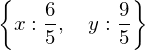

In [27]:
solve([x + y - 3, 3*x - 2*y], [x, y])

The function `solve` is like a Swiss Army knife you can use to solve
all kind of problems. Suppose you want to *complete the square* in the
expression $x^2 - 4x + 7$, that is, you want to find constants $h$ and $k$
such that $x^2 -4x + 7 = (x-h)^2 + k$. There is no special &ldquo;complete the
square&rdquo; function in `SymPy`, but you can call solve on the equation
$(x - h)^2 + k - (x^2 - 4x + 7) = 0$ to find the unknowns $h$ and $k$:

In [28]:
h, k = symbols('h k')
solve( (x-h)**2 + k - (x**2-4*x+7), [h,k] )

In [29]:
((x-2)**2+3).expand()  # so h = 2 and k = 3, verify...

Learn the basic `SymPy` commands and you'll never need to suffer
another tedious arithmetic calculation painstakingly performed by
hand again!

### Polynomials

Let's define a polynomial $P$ with roots at $x = 1$, $x = 2$, and $x = 3$:

In [36]:
P = (x-1)*(x-2)*(x-3)
P

To see the expanded version of the polynomial, call its `expand` method:

In [37]:
P.expand()

When the polynomial is expressed in it's expanded form $P(x) =
x^3 - 6x^2 + 11x - 6$, we can't immediately identify its roots. This is
why the factored form $P(x) = (x - 1)(x - 2)(x - 3)$ is preferable. To
factor a polynomial, call its `factor` method or simplify it:

In [38]:
P.factor()

In [39]:
P.simplify()

Recall that the roots of the polynomial $P(x)$ are defined as the
solutions to the equation $P(x) = 0$. We can use the `solve` function
to find the roots of the polynomial:

### Equality checking

In the last example, we used the `simplify` function to check whether
two expressions were equal. This way of checking equality works
because $P = Q$ if and only if $P - Q = 0$. This is the best way to
check if two expressions are equal in `SymPy` because it attempts all
possible simplifications when comparing the expressions. Below is
a list of other ways to check whether two quantities are equal with
example cases where they fail:

In [42]:
p = (x-5)*(x+5)
q = x**2 - 25

In [43]:
p == q                      # fail

False

In [44]:
p - q == 0                  # fail

False

In [45]:
simplify(p - q) == 0

True

In [46]:
sin(x)**2 + cos(x)**2 == 1  # fail

False

In [47]:
simplify( sin(x)**2 + cos(x)**2 - 1) == 0

True

### Trigonometry

The trigonometric functions `sin` and `cos` take inputs in radians:

In [48]:
sin(pi/6)

In [49]:
cos(pi/6)

For angles in degrees, you need a conversion factor of $\frac{\pi}{180}$[rad/$^\circ$]:

In [50]:
sin(30*pi/180)  # 30 deg = pi/6 rads

## Calculus

Calculus is the study of the properties of functions. The operations of
calculus are used to describe the limit behaviour of functions, calculate
their rates of change, and calculate the areas under their graphs. In
this section we'll learn about the `SymPy` functions for calculating
limits, derivatives, integrals, and summations.

### Infinity

The infinity symbol is denoted `oo` (two lowercase `o`s) in `SymPy`. Infinity
is not a number but a process: the process of counting forever. Thus,
$\infty + 1 = \infty$, $\infty$ is greater than any finite number, and $1/\infty$ is an
infinitely small number. `Sympy` knows how to correctly treat infinity
in expressions:

In [78]:
oo+1

In [79]:
5000 < oo

In [80]:
1/oo

### Limits

We use limits to describe, with mathematical precision, infinitely large
quantities, infinitely small quantities, and procedures with infinitely
many steps.

The number $e$ is defined as the limit $e \equiv \lim_{n\to\infty}\left(1+\frac{1}{n}\right)^n$:

In [81]:
limit( (1+1/n)**n, n, oo)

This limit expression describes the annual growth rate of a loan with
a nominal interest rate of 100% and infinitely frequent compounding.
Borrow \$1000 in such a scheme, and you'll owe $2718.28 after one year.

Limits are also useful to describe the behaviour of functions. Consider
the function $f(x) = \frac{1}{x}$. The `limit` command shows us what happens
to $f(x)$ near $x = 0$ and as $x$ goes to infinity:

In [82]:
limit( 1/x, x, 0, dir="+")

In [83]:
limit( 1/x, x, 0, dir="-")

In [84]:
limit( 1/x, x, oo)

### Derivatives

The derivative function, denoted $f'(x)$, $\frac{d}{dx}f(x)$, $\frac{df}{dx}$, or $\frac{dy}{dx}$, 
describes the *rate of change* of the function $f(x)$.
The `SymPy` function `diff` computes the derivative of any expression:

In [88]:
diff(x**3, x)

The differentiation operation knows about the product rule $[f(x)g(x)]^\prime=f^\prime(x)g(x)+f(x)g^\prime(x)$, 
the chain rule $f(g(x))' = f'(g(x))g'(x)$, 
and the quotient rule $\left[\frac{f(x)}{g(x)}\right]^\prime = \frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}$:

In [89]:
diff( x**2*sin(x), x )

In [90]:
diff( sin(x**2), x )

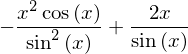

In [91]:
diff( x**2/sin(x), x )

The second derivative of a function `f` is `diff(f,x,2)`:

In [92]:
diff(x**3, x, 2)   # same as diff(diff(x**3, x), x)

The exponential function $f(x)=e^x$ is special because it is equal to its derivative:

In [93]:
diff( exp(x), x )  # same as diff( E**x, x  )

A differential equation is an equation that relates some unknown function $f(x)$ to its derivative. 
An example of a differential equation is $f'(x)=f(x)$.
What is the function $f(x)$ which is equal to its derivative?
You can either try to guess what $f(x)$ is or use the `dsolve` function:

### Tangent lines

The *tangent line* to the function $f(x)$ at $x=x_0$ is 
the line that passes through the point $(x_0, f(x_0))$ and has 
the same slope as the function at that point.
The tangent line to the function $f(x)$ at the point $x=x_0$ is described by the equation

$$
   T_1(x) =  f(x_0) \ + \  f'(x_0)(x-x_0).
$$

What is the equation of the tangent line to $f(x)=\frac{1}{2}x^2$ at $x_0=1$?

In [95]:
f = S('1/2')*x**2
f

In [96]:
df = diff(f,x)
df

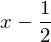

In [97]:
T_1 = f.subs({x:1}) + df.subs({x:1})*(x - 1)
T_1

The tangent line $T_1(x)$ has the same value and slope as the function $f(x)$ at $x=1$:

In [98]:
T_1.subs({x:1}) == f.subs({x:1})

True

In [99]:
diff(T_1,x).subs({x:1}) == diff(f,x).subs({x:1})

True

### Integrals

The *integral* of $f(x)$ corresponds to the computation of the area under the graph of $f(x)$.
The area under $f(x)$ between the points $x=a$ and $x=b$ is denoted as follows:

$$
 A(a,b) = \int_a^b f(x) \: dx.
$$

The *integral function* $F$ corresponds to the area calculation as a function 
of the upper limit of integration:

$$
  F(c) \equiv \int_0^c \! f(x)\:dx\,.
$$

The area under $f(x)$ between $x=a$ and $x=b$ is obtained by 
calculating the *change* in the integral function:

$$
   A(a,b) = \int_a^b \! f(x)\:dx  =  F(b)-F(a).
$$

In `SymPy` we use `integrate(f, x)` to obtain the integral function $F(x)$ of any function $f(x)$:
$F(x) = \int_0^x f(u)\,du$.

In [104]:
integrate(x**3, x)

In [105]:
integrate(sin(x), x)

In [106]:
integrate(ln(x), x)

This is known as an *indefinite integral* since the limits of integration are not defined. 

In contrast, 
a *definite integral* computes the area under $f(x)$ between $x=a$ and $x=b$.
Use `integrate(f, (x,a,b))` to compute the definite integrals of the form $A(a,b)=\int_a^b f(x) \, dx$:

In [107]:
integrate(x**3, (x,0,1))  # the area under x^3 from x=0 to x=1

We can obtain the same area by first calculating the indefinite integral $F(c)=\int_0^c \!f(x)\,dx$,
then using $A(a,b) = F(x)\big\vert_a^b \equiv F(b) - F(a)$:

In [108]:
F = integrate(x**3, x)
F.subs({x:1}) - F.subs({x:0})

Integrals correspond to *signed* area calculations:

In [109]:
integrate(sin(x), (x,0,pi))

In [110]:
integrate(sin(x), (x,pi,2*pi))

In [111]:
integrate(sin(x), (x,0,2*pi))

During the first half of its $2\pi$-cycle,
the graph of $\sin(x)$ is above the $x$-axis, so it has a positive contribution to the area under the curve.
During the second half of its cycle (from $x=\pi$ to $x=2\pi$),
$\sin(x)$ is below the $x$-axis, so it contributes negative area.
Draw a graph of $\sin(x)$ to see what is going on.

### Fundamental theorem of calculus

The integral is the &ldquo;inverse operation&rdquo; of the derivative.
If you perform the integral operation followed by the derivative operation on some function, 
you'll obtain the same function:

$$
  \left(\frac{d}{dx} \circ \int dx \right) f(x) \equiv \frac{d}{dx} \int_c^x f(u)\:du = f(x).
$$

In [112]:
f = x**2
F = integrate(f, x)
F

In [113]:
diff(F,x)

Alternately, if you compute the derivative of a function followed by the integral,
you will obtain the original function $f(x)$ (up to a constant):

$$
  \left( \int dx \circ \frac{d}{dx}\right) f(x) \equiv \int_c^x f'(u)\;du = f(x) + C.
$$

In [114]:
f = x**2
df = diff(f,x)
df

In [115]:
integrate(df, x)

The fundamental theorem of calculus is important because it tells us how to solve differential equations.
If we have to solve for $f(x)$ in the differential equation $\frac{d}{dx}f(x) = g(x)$,
we can take the integral on both sides of the equation to obtain the answer $f(x) = \int g(x)\,dx + C$.